In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# NumbaSOM

> A Fast Self-Organizing Map Python Library Implemented in Numba.

If you need a **fast and simple to use** SOM library implemented as a 2D lattice or torus, check this out. It utilizes online rather than batch training. 

## Install

`pip install numbasom`

## How to use

Train a SOM on 1000 random 3-dimensional vectors:

In [ ]:
import numpy as np
from numbasom import SOM, u_matrix, plot_u_matrix

#### Load some data

In [ ]:
data = np.random.randn(100,3)

#### Initialize the library

In [ ]:
som = SOM(som_size=(20,20))

#### Train

In [ ]:
lattice = som.train(data, num_iterations=1000)

Data scaling took: 0.338414 seconds.
SOM training took: 1.049132 seconds.


#### Display the value in the first row and first column of the lattice

In [ ]:
lattice[1::6,1]

array([[0.72234145, 0.20699402, 0.48731189],
       [0.49514563, 0.18585944, 0.64291118],
       [0.39127316, 0.13052984, 0.4517087 ],
       [0.40195937, 0.42461381, 0.14699424]])

#### Make U-matrix

In [ ]:
um = u_matrix(lattice)

#### Plot U-matrix

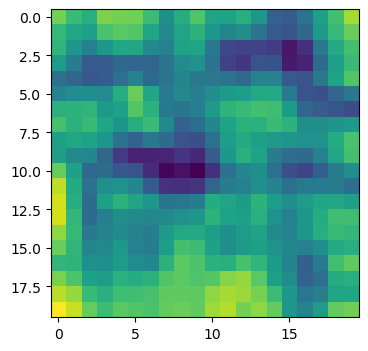

In [ ]:
plot_u_matrix(um)